---
Load Cancer Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Load Dataset

# X_train=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y_train=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# X_test=pd.read_csv('../../../Fase3_Test_Input.csv').to_numpy()
# y_test=pd.read_csv('../../../Fase3_Test_Targets.csv').to_numpy().flatten()

X1=pd.read_csv('../../../Fase3_Train_Input.csv')
X2=pd.read_csv('../../../Fase3_Test_Input.csv')
y1=pd.read_csv('../../../Fase3_Train_Targets.csv')
y2=pd.read_csv('../../../Fase3_Test_Targets.csv')
Data=pd.concat([X1, X2]).to_numpy()
Targets=pd.concat([y1, y2]).to_numpy().flatten()

# X1=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y1=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# Data=X1
# Targets=y1

Data Preprocessing
Let's remove unnecessary columns from the dataset.

In [10]:
#Espacio para preprocesamiento del dataset: eliminación de outliers, elimación datos faltantes,....

---
Particionar Data Set

In [11]:
from sklearn.model_selection import train_test_split

# Con Data Frame
#X = df.drop('target', axis=1)
#y = df[['target']]
# ó También sin Data Frame
#X= cancer_ds['data']
#y= cancer_ds['target']

print(type(Data),type(Targets),sep="----")
print(Data.shape,Targets.shape,sep="----")

X_train, X_test, y_train, y_test = train_test_split(Data, Targets,
                  train_size=0.7, test_size=0.3, stratify=Targets, shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

# X es una matriz, y es un vector
print("X_train shape: {}".format(X_train.shape))  
#print("y_train :", y_train)
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

<class 'numpy.ndarray'>----<class 'numpy.ndarray'>
(450, 3)----(450,)
X_train shape: (315, 3)
y_train shape: (315,)
X_test shape: (135, 3)
y_test shape: (135,)


---
Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error


y_pred_train = shallow_tree.predict(X_train)
score1 = metrics.accuracy_score(y_train, y_pred_train)


y_pred_test = shallow_tree.predict(X_test)
score2 = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy Train:',{score1: .3f}, 'Accuracy Test',{score2: .3f}")


Accuracy Train:', 0.971, 'Accuracy Test', 0.948


___
AdaBoost Classifier
---

To calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 60 with a step of 3 in the lines:


In [13]:
from sklearn.ensemble import AdaBoostClassifier
# adaboost with the tree as base 

estimators = list(range(1, 60, 3))  #increase the number of trees from 1 to 60 with a step of 3

abc_scores = []

for n_est in estimators:
    ABC = AdaBoostClassifier(estimator=shallow_tree, n_estimators = n_est)
    #ABC = AdaBoostClassifier(estimator=shallow_tree, learning_rate=1.0, 
    #                         n_estimators = n_est, algorithm='SAMME')
    
    ABC.fit(X_train, y_train)

    y_pred = ABC.predict(X_test)

    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

# Last AdaBoost Classifier Information 
print('Base estimator:',ABC.estimator_)
print('List of clssifiers:', ABC.estimators_)
print('Weights for each estimator:', ABC.estimator_weights_)
print('Classification error for each estimator:',ABC.estimator_errors_)
print('Number of features:',ABC.n_features_in_)

Base estimator: DecisionTreeClassifier(max_depth=2, random_state=100)
List of clssifiers: [DecisionTreeClassifier(max_depth=2, random_state=525186876), DecisionTreeClassifier(max_depth=2, random_state=2094006548), DecisionTreeClassifier(max_depth=2, random_state=1189517372), DecisionTreeClassifier(max_depth=2, random_state=27805533), DecisionTreeClassifier(max_depth=2, random_state=263146522), DecisionTreeClassifier(max_depth=2, random_state=1544519116), DecisionTreeClassifier(max_depth=2, random_state=57098353), DecisionTreeClassifier(max_depth=2, random_state=305624646), DecisionTreeClassifier(max_depth=2, random_state=725608472), DecisionTreeClassifier(max_depth=2, random_state=1121542840), DecisionTreeClassifier(max_depth=2, random_state=1418712595), DecisionTreeClassifier(max_depth=2, random_state=545213523), DecisionTreeClassifier(max_depth=2, random_state=749580444), DecisionTreeClassifier(max_depth=2, random_state=381072185), DecisionTreeClassifier(max_depth=2, random_state=673

Plot test scores vs n_estimators

Adaboost Classif [0.9481481481481482, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852, 0.9851851851851852]


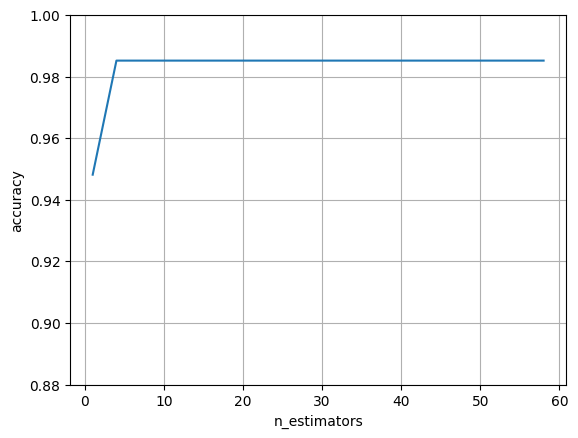

In [14]:
print('Adaboost Classif',abc_scores)
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.88, 1])
plt.grid()
plt.show()